In [ ]:
from dolfin import *
from mshr import *

In [20]:
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, update_display
import time
import dolfin.common.plotting as fenicsplot 

def plot_compact(u, t, stepcounter, QQ, pl, ax, soltit = "Velocity"): # Compact plot utility function
  if stepcounter == 0:
    pl, ax = plt.subplots(); display(pl); clear_output(); # Plotting setup
  if stepcounter % 5 == 0:
    #u.set_allow_extrapolation(True)
    uEuclidnorm = project(sqrt(inner(u, u)), QQ)
    ax.cla()
    fig = plt.gcf()
    fig.set_size_inches(16, 4)
    plt.subplot(1, 2, 1)
    pp = plot(uEuclidnorm, cmap="coolwarm")
    plt.title("%s at t=%f" % (soltit, t)) # Plot norm of solution
    if t == 0:
      plt.axis(G)
      plt.colorbar(pp, shrink=0.5)
    plt.subplot(1, 2, 2);
    if t == 0:
      plot(QQ.mesh())
      plt.title("Mesh") # Plot mesh
#     plt.tight_layout(); dpl = display(pl, display_id="test");
  
  return (pl, ax)

def plot_compact_static(u, QQ, label = "Velocity"): # Compact plot utility function
  pl, ax = plt.subplots();
  uEuclidnorm = project(sqrt(inner(u, u)), QQ); ax.cla(); fig = plt.gcf(); fig.set_size_inches(16, 4)
  plt.subplot(1, 2, 1); pp = plot(uEuclidnorm, cmap="coolwarm"); plt.title("%s" % (label)) # Plot norm of velocity
  plt.axis(G); plt.colorbar(pp, shrink=0.5); 
  plt.subplot(1, 2, 2);
  plot(QQ.mesh()); plt.title("Mesh") # Plot mesh
#   plt.tight_layout(); dpl = display(pl, display_id="test");
  
  return (pl, ax)

# Heat Equation

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


<ipython-input-20-9fe2662aa79f>:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  pl, ax = plt.subplots();
<ipython-input-20-9fe2662aa79f>:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  pl, ax = plt.subplots();
<ipython-input-20-9fe2662aa79f>:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  pl, ax = plt.subplots();
<ipy

elapsed CPU time:  5.822493323999879


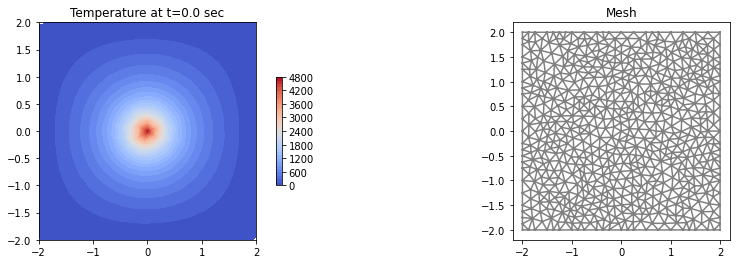

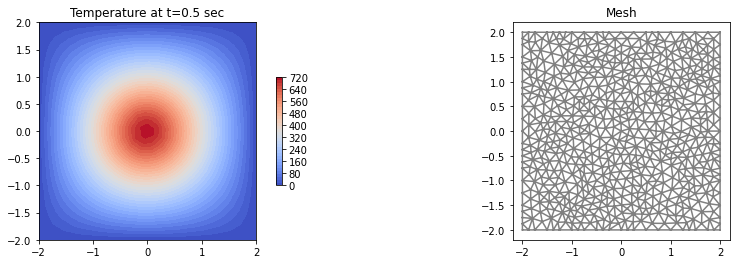

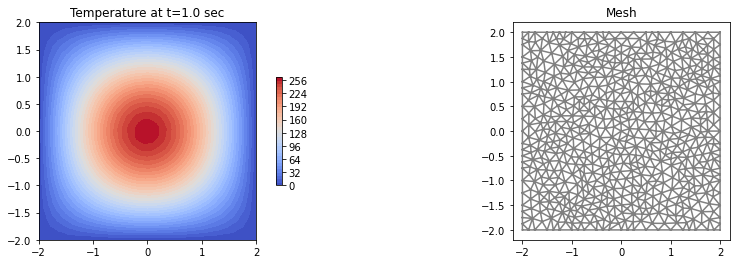

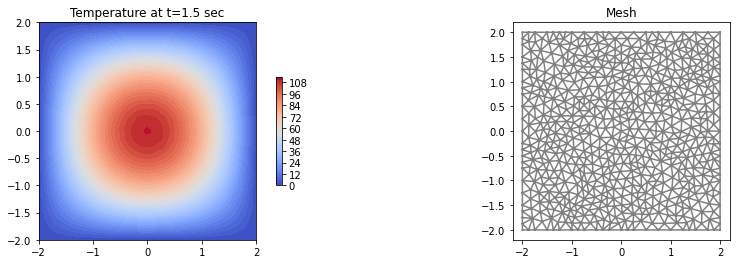

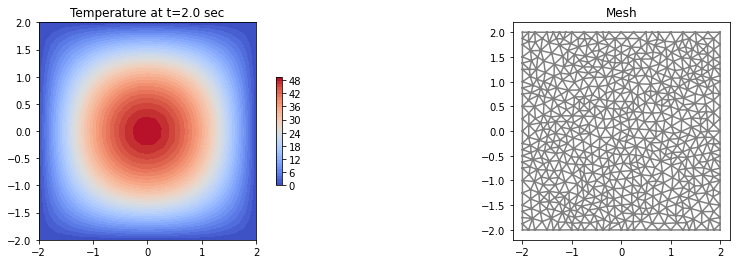

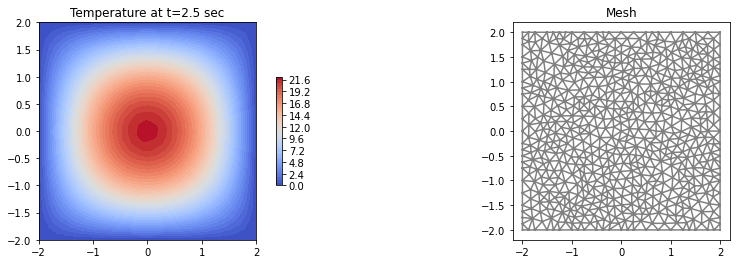

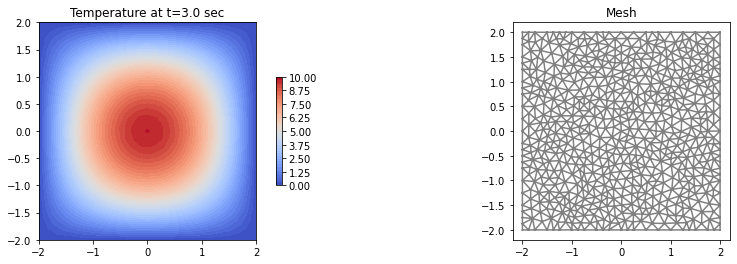

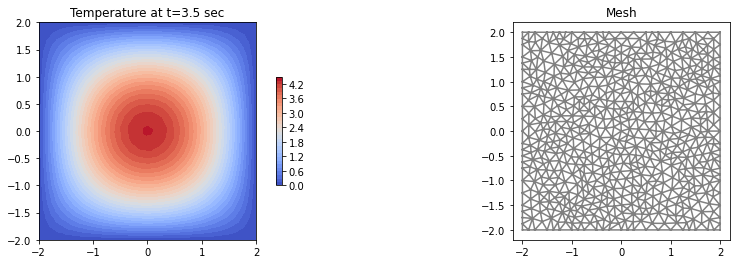

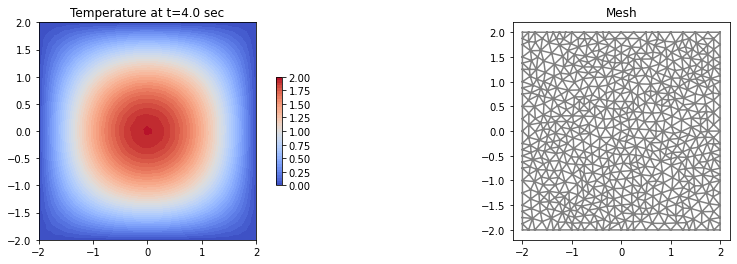

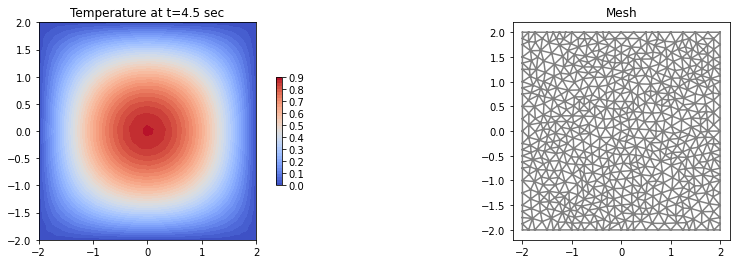

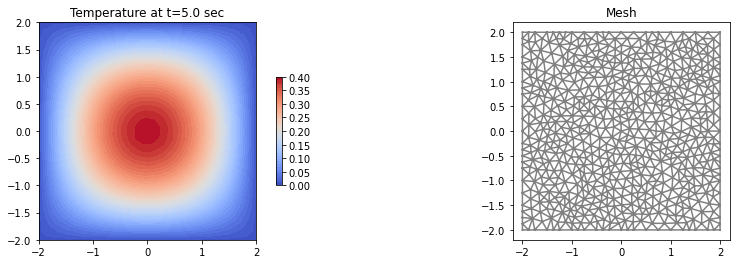

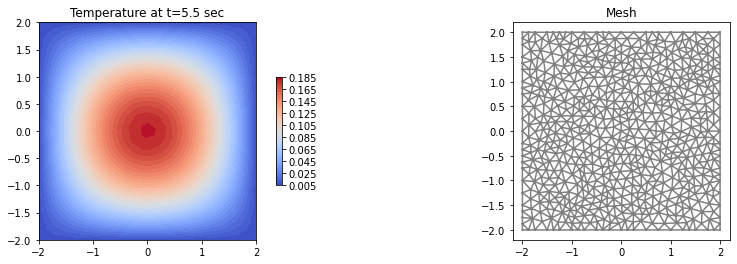

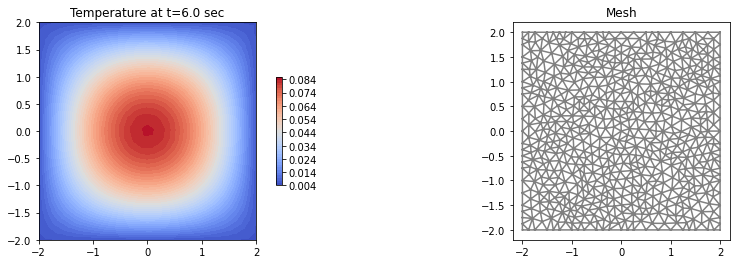

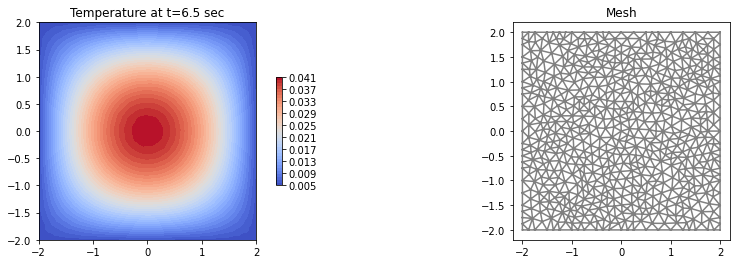

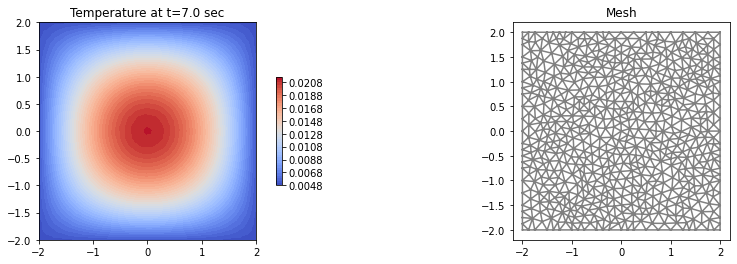

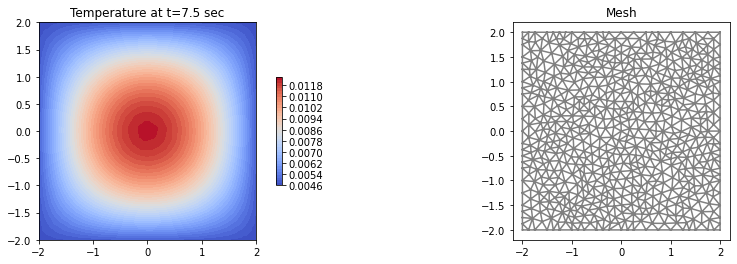

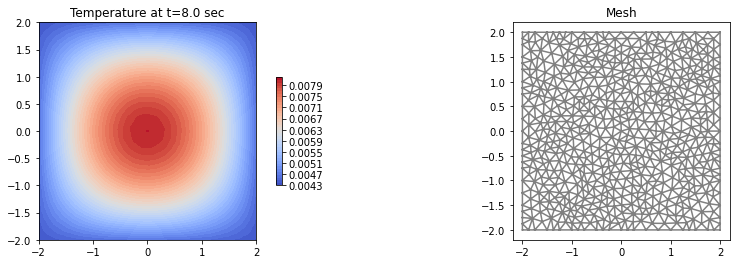

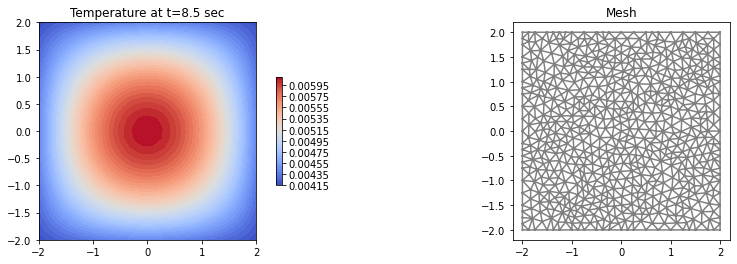

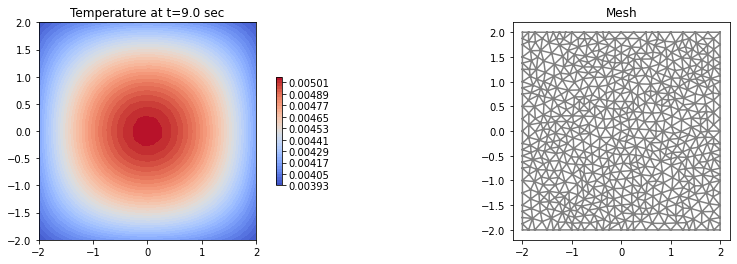

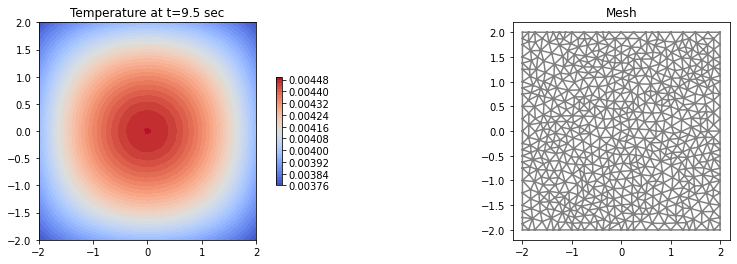

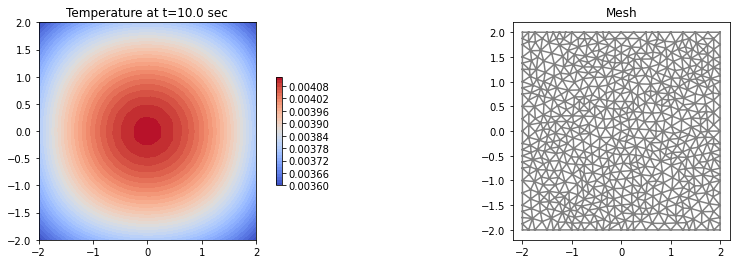

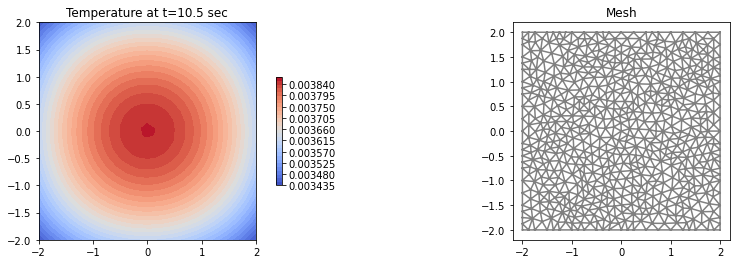

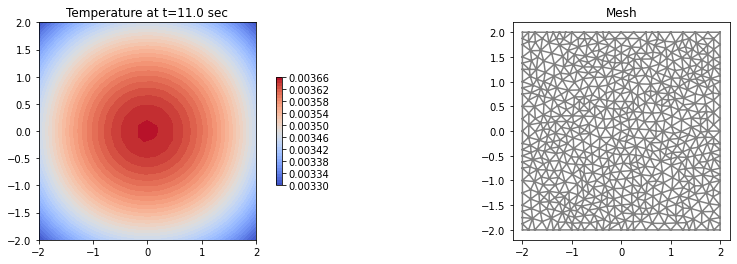

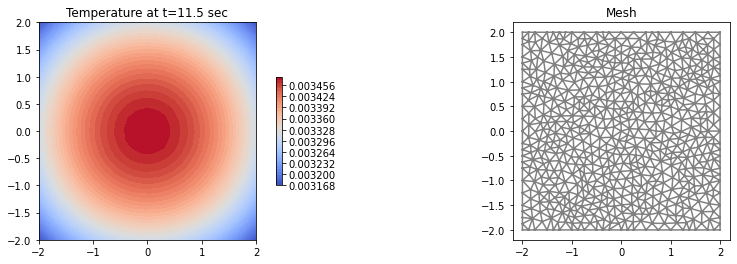

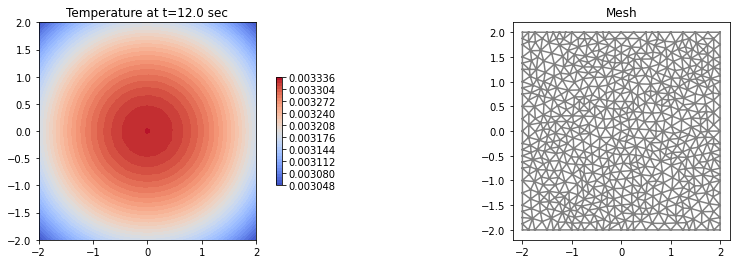

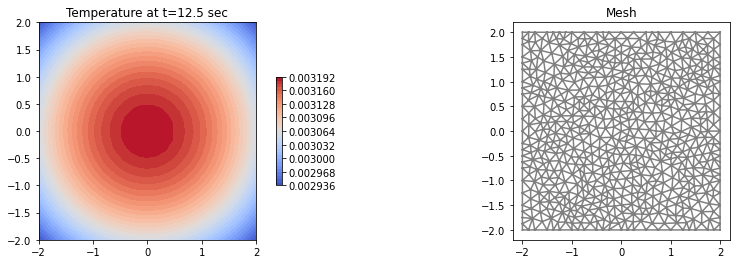

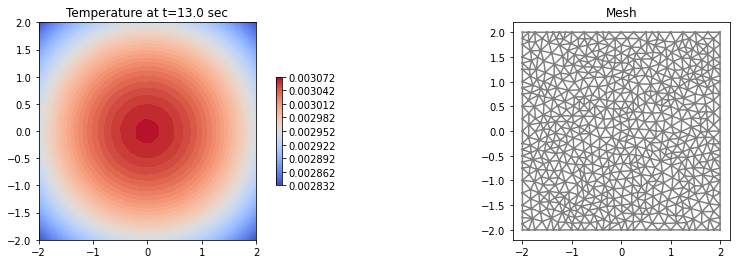

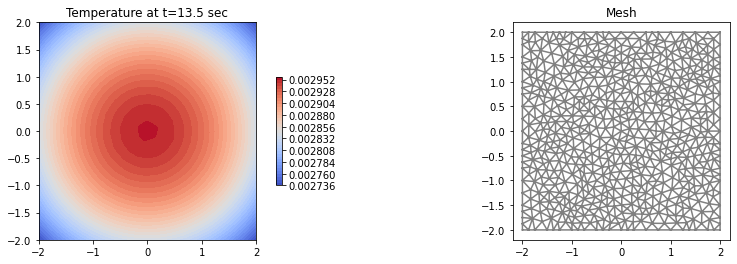

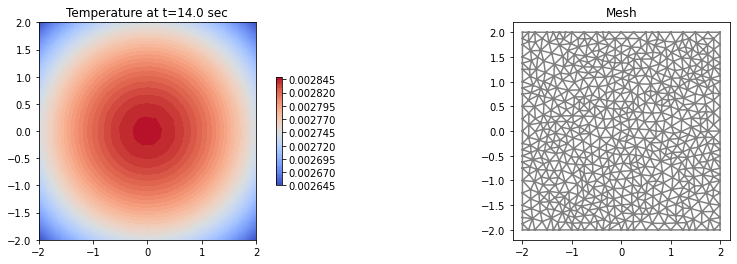

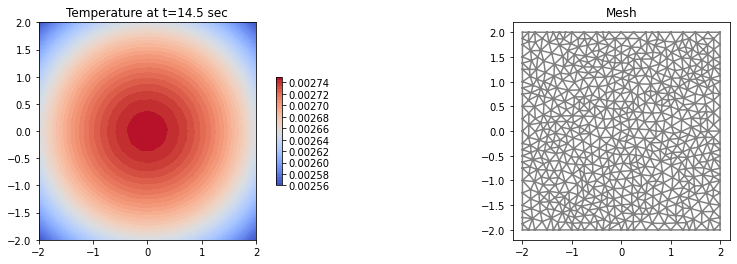

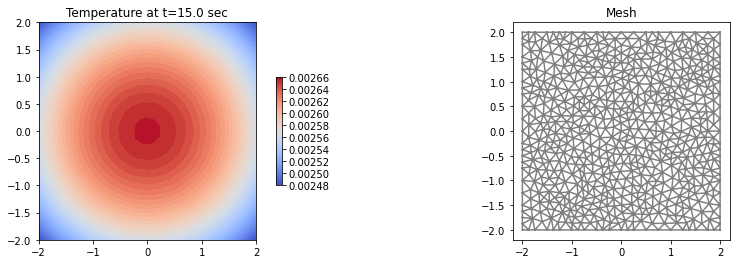

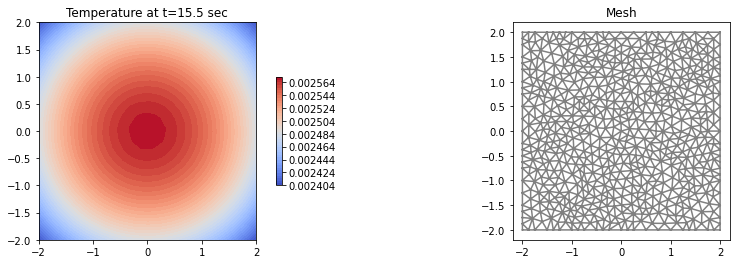

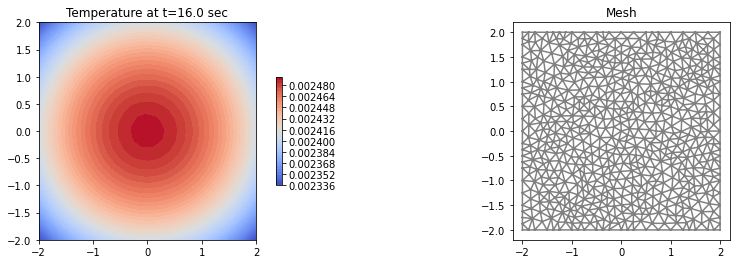

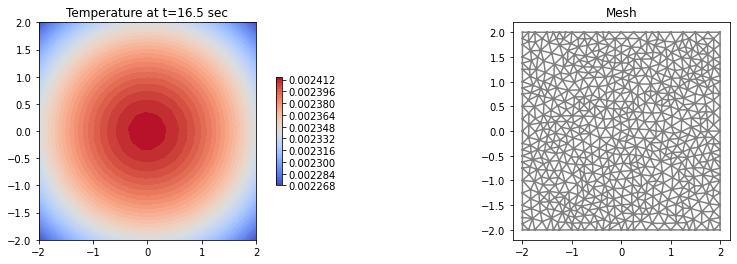

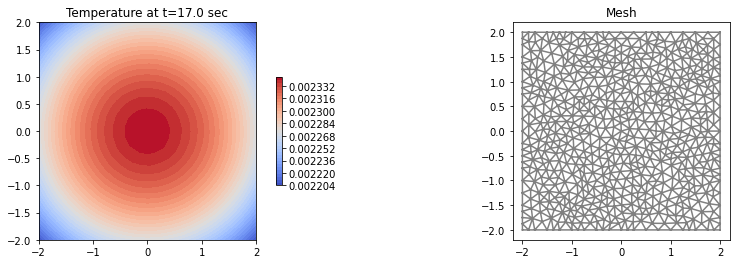

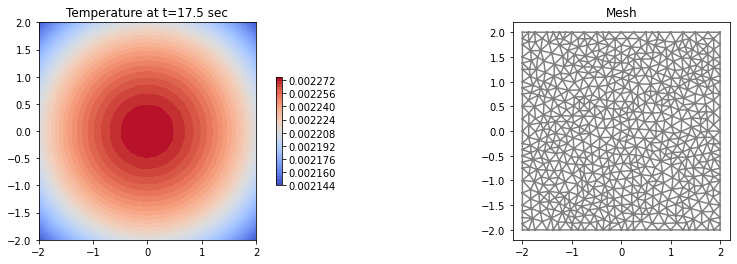

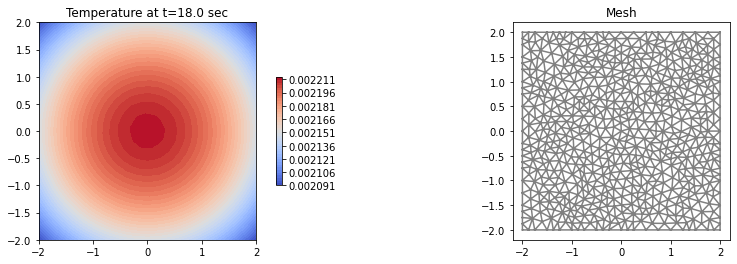

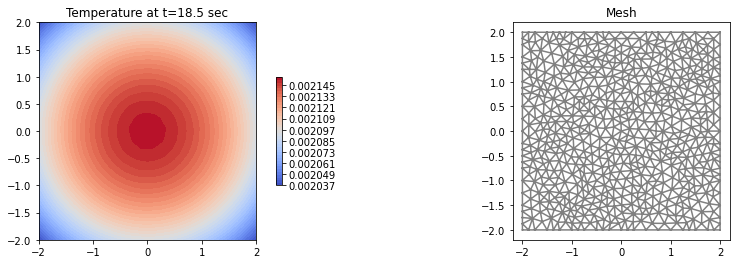

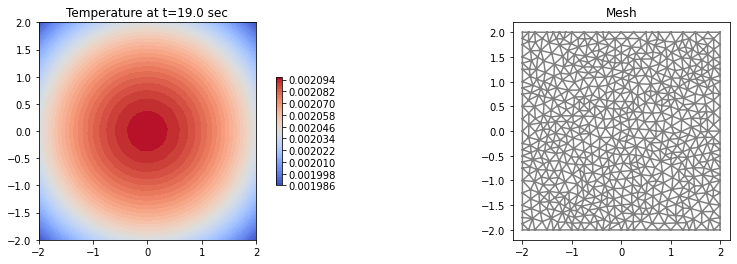

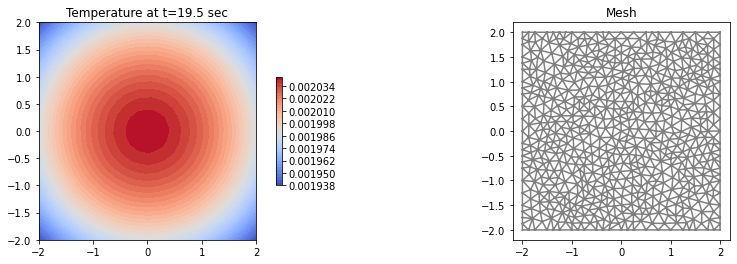

In [24]:
# Define domain and mesh
XMIN, XMAX = -2., 2.; 
YMIN, YMAX = -2., 2.; 
G = [XMIN, XMAX, YMIN, YMAX];
mresolution = 20;
mesh = generate_mesh(Rectangle(Point(G[0], G[2]), Point(G[1], G[3])), mresolution)

# Define finite element function space
degree = 1;
V = FunctionSpace(mesh, "CG", degree);

# Finite element functions
v = TestFunction(V); 
u = Function(V);

# Define boundary conditions
def boundary(x, on_boundary):
    return on_boundary

# Time parameters
theta = 1.0 # Implicit Euler
k = 0.5; # Time step
t, T = 0., 20.; # Start and end time

# Exact solution
k_coeff = 2
ue = Expression("exp(-(x[0]*x[0]+x[1]*x[1])/(4*a*t))/(4*pi*a*t)", a=k_coeff, t=1e-7, degree=degree, domain=mesh) 
u0 = ue;

bc = DirichletBC(V, ue, boundary)

# Inititalize time stepping
pl, ax = None,None
stepcounter = 0; 
timer0 = time.process_time()

# Time-stepping loop
while t < T: 
    # Time scheme
    um = theta*u + (1.0-theta)*u0 
    
    # Weak form of the heat equation in residual form
    r = (u - u0)/k*v*dx + k_coeff*inner(grad(um), grad(v))*dx 
    
    # Solve the Heat equation (one timestep)
    solve(r==0, u, bc)  
    
    # Plot all quantities (see implementation above)
#     if stepcounter %5 ==0:
#         uEuclidnorm = project(u,V)
#         plt.figure()
#         cm = plt.cm.get_cmap('jet')
#         sc = plot(uEuclidnorm.cmap = cm); plt.title("Heat-t: %f" % (t))
#         plt.colorbar(sc)
#     pl, ax = plot_compact(u, t, stepcounter, V, pl, ax, soltit = "Temperature")
    pl, ax = plot_compact_static(u, V, label = "Temperature at t={} sec".format(t))
    
    # Shift to next timestep
    t += k; u0 = project(u, V); 
    ue.t = t;
    stepcounter += 1 
    
print("elapsed CPU time: ", (time.process_time() - timer0))

# Wave equation